In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Path().cwd()

PosixPath('/Users/lode/projects/awv/python-github-action-template')

In [3]:
URL_BASE_IMAGE = "./shots/rotselaar_20230517-012912.png"
base_image = Path(URL_BASE_IMAGE)
assert base_image.exists()

In [4]:
imb = cv2.cvtColor(cv2.imread(base_image.as_posix()), cv2.COLOR_BGR2RGB)

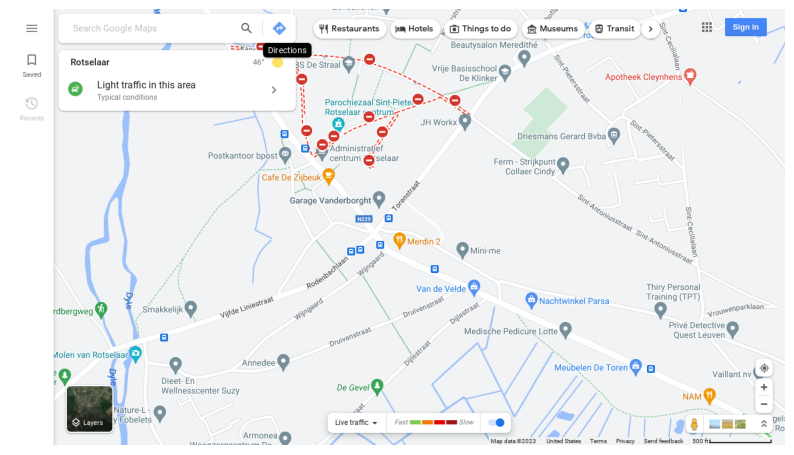

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(imb);

In [6]:
URL_TEST_IMAGE = "shots/rotselaar_20230515-173440.png"
test_image = Path(URL_TEST_IMAGE)
assert test_image.exists()

In [7]:
im = cv2.cvtColor(cv2.imread(test_image.as_posix()), cv2.COLOR_BGR2RGB)

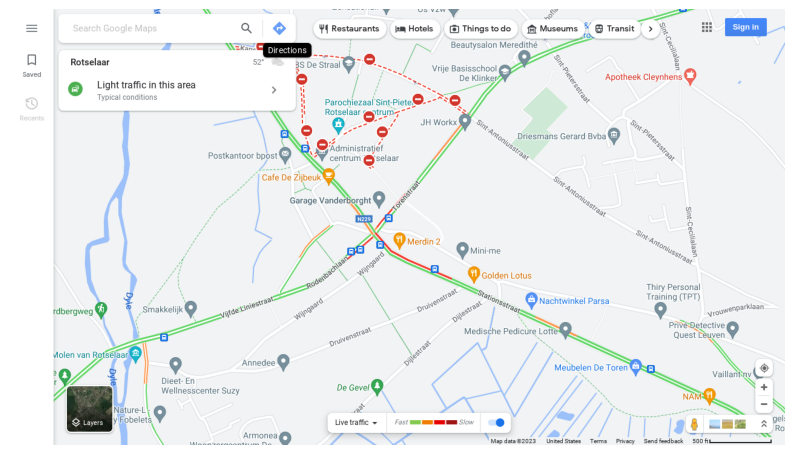

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(im);

In [9]:
# diff = cv2.subtract(imb, im)
diff = cv2.absdiff(imb, im)

In [10]:
diff.shape

(720, 1280, 3)

In [11]:
gray_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
gray_diff.shape

(720, 1280)

In [12]:
gray_diff.max()

176

In [13]:
(thresh, mask_img) = cv2.threshold(gray_diff, 1, 255, cv2.THRESH_BINARY)

In [14]:
mask_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

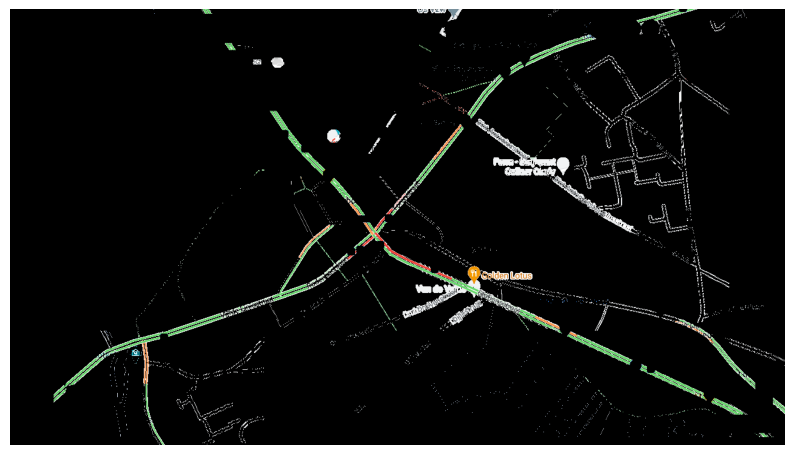

In [15]:
result = cv2.bitwise_and(im, im, mask=mask_img)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result);

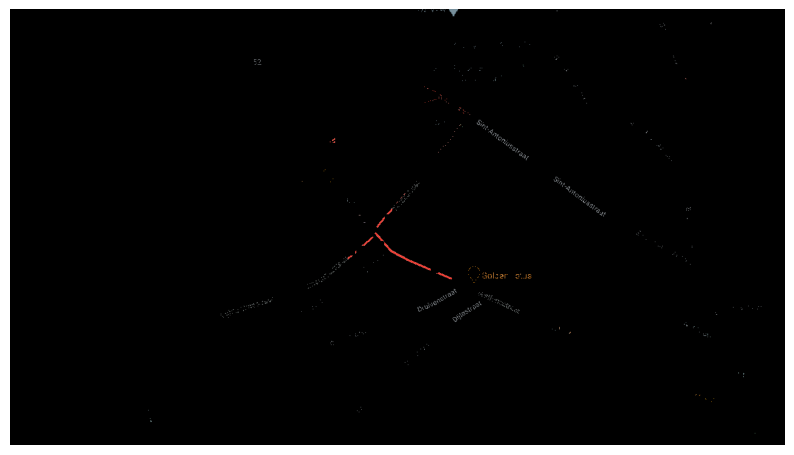

In [16]:
lower_range = np.array([100, 10, 10])
upper_range = np.array([252, 160, 160])
mask = cv2.inRange(result, lower_range, upper_range)
result_within_bounds = cv2.bitwise_and(result, result, mask=mask)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result_within_bounds);

In [17]:
rgb_diff_mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)

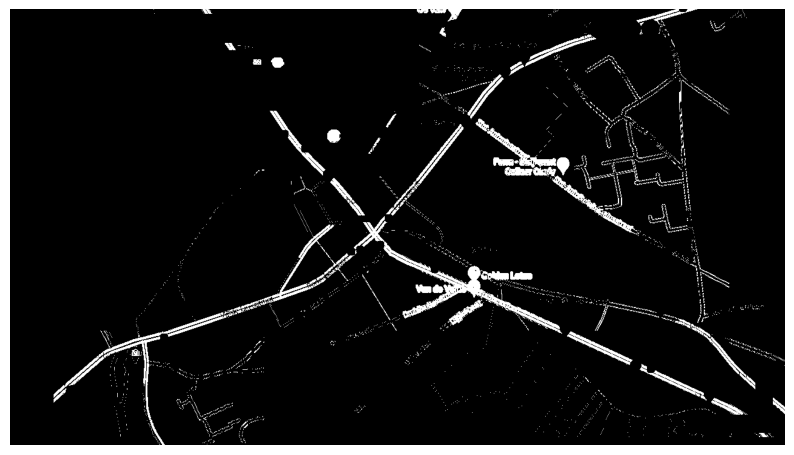

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(rgb_diff_mask);

In [19]:
# Split the difference image into its color channels
b, g, r = cv2.split(diff)

# Combine the color channels into a single image
zeros = np.zeros(gray_diff.shape[:2], dtype=np.uint8)
diff_image = cv2.merge((mask_img, zeros, zeros))

In [20]:
ret, mask = cv2.threshold(diff_image, 1, 1,cv2.THRESH_BINARY_INV)

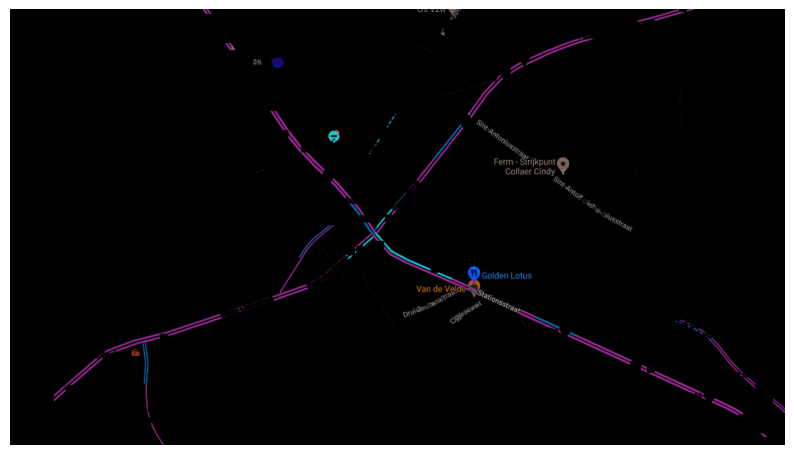

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(diff);

In [22]:
Conv_hsv_Gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

In [23]:
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

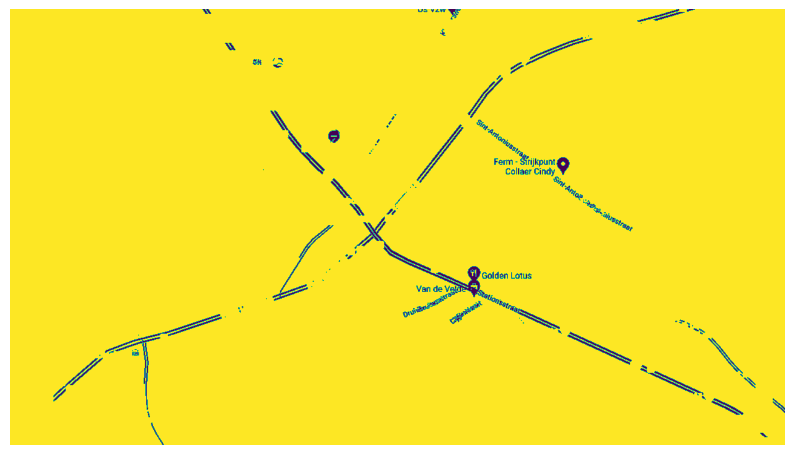

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(mask);

# Select the red stripes

In [25]:
lower_range = np.array([229, 0, 0])
upper_range = np.array([231, 0, 0])
mask = cv2.inRange(im, lower_range, upper_range)
result = cv2.bitwise_and(im, im, mask=mask)

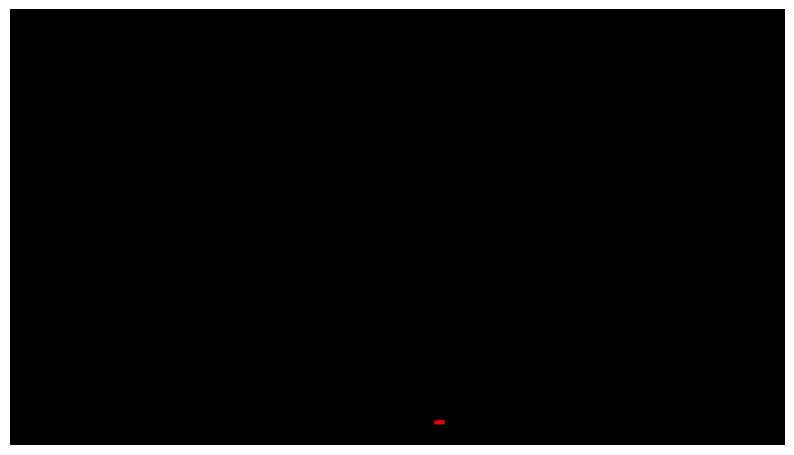

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result);

# Color select in HSV

<!-- imb_hsv = cv.cvtColor(imb, cv.COLOR_RGB2HSV)
im_hsv = cv.cvtColor(im, cv.COLOR_RGB2HSV)
frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
result = cv2.bitwise_and(im, im, mask=mask)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(result); -->


# Iterate over images

In [27]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()

In [28]:
from datetime import datetime
import pandas as pd
import re

In [29]:
points = [(597, 378), # Vijfde Linie straat aankomen uit ZW dicths bij kruispunt
          (587, 386),
          (561, 409),
          (488, 462),
          (442, 478)
]

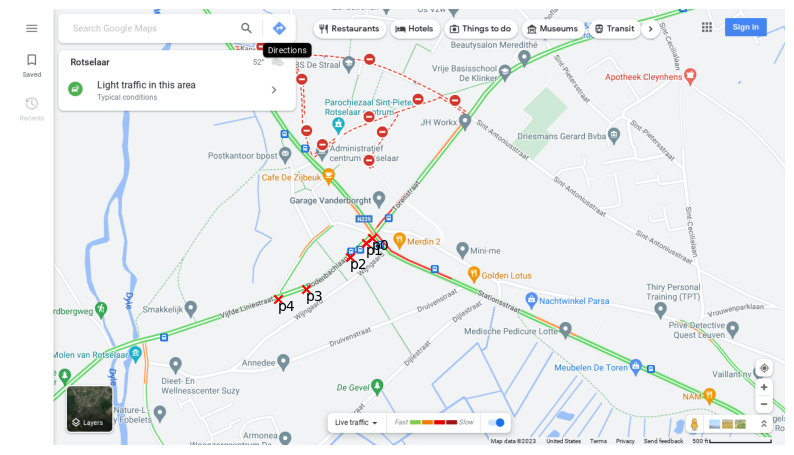

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
ax.imshow(im);
for i, p in enumerate(points):
    ax.scatter(p[0], p[1], marker="x", color="red")
    ax.annotate(f"p{i}", (p[0], p[1]), horizontalalignment="left", verticalalignment="top")

In [30]:
rows = []
for p in url_image_dir.glob("rotselaar_*.png"):
    print (p.stem)
    timestamp = datetime.strptime(p.stem, "rotselaar_%Y%m%d-%H%M%S")
    print(timestamp)
    screenshot = cv2.cvtColor(cv2.imread(p.as_posix()), cv2.COLOR_BGR2RGB)
    colors = ()
    for point in points:
        color = screenshot[point[1], point[0]]
        print(color)
        colors += (color, color[0], color[1], color[2])
    row = (p, timestamp) + colors
    rows.append(row)

rotselaar_20230516-011517
2023-05-16 01:15:17
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
rotselaar_20230516-145350
2023-05-16 14:53:50
[242  60  50]
[242  60  50]
[242  60  50]
[ 99 214 104]
[ 99 214 104]
rotselaar_20230517-014210
2023-05-17 01:42:10
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
rotselaar_20230517-042532
2023-05-17 04:25:32
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
rotselaar_20230516-113705
2023-05-16 11:37:05
[242  60  50]
[242  60  50]
[242  60  50]
[ 99 214 104]
[ 99 214 104]
rotselaar_20230517-045856
2023-05-17 04:58:56
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
rotselaar_20230516-215443
2023-05-16 21:54:43
[255 151  77]
[255 151  77]
[255 151  77]
[ 99 214 104]
[ 99 214 104]
rotselaar_20230517-131333
2023-05-17 13:13:33
[ 99 214 104]
[ 99 214 104]
[ 99 214 104]
[ 99 214 104]
[ 99 214 104]
rotselaar_20230517-082112
2023-05-17 08:21:12
[255 151  77]
[255 151  77

In [31]:
all_columns = ["path", "timestamp"]
for i,p in enumerate(points):
    all_columns.extend((f"color_{i}", f"p{i}_red", f"p{i}_green", f"p{i}_blue"))
all_columns

['path',
 'timestamp',
 'color_0',
 'p0_red',
 'p0_green',
 'p0_blue',
 'color_1',
 'p1_red',
 'p1_green',
 'p1_blue',
 'color_2',
 'p2_red',
 'p2_green',
 'p2_blue',
 'color_3',
 'p3_red',
 'p3_green',
 'p3_blue',
 'color_4',
 'p4_red',
 'p4_green',
 'p4_blue']

In [32]:
df = pd.DataFrame(rows, columns=all_columns)
df.head()

,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,p1_blue,...,p2_green,p2_blue,color_3,p3_red,p3_green,p3_blue,color_4,p4_red,p4_green,p4_blue
0,shots/rotselaar_20230516-011517.png,2023-05-16 01:15:17,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,255,255,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255
1,shots/rotselaar_20230516-145350.png,2023-05-16 14:53:50,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,60,50,"[99, 214, 104]",99,214,104,"[99, 214, 104]",99,214,104
2,shots/rotselaar_20230517-014210.png,2023-05-17 01:42:10,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,255,255,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255
3,shots/rotselaar_20230517-042532.png,2023-05-17 04:25:32,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,255,255,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255
4,shots/rotselaar_20230516-113705.png,2023-05-16 11:37:05,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,60,50,"[99, 214, 104]",99,214,104,"[99, 214, 104]",99,214,104


In [33]:
df["color_0"].astype(str).unique()

array(['[255 255 255]', '[242  60  50]', '[255 151  77]', '[ 99 214 104]',
       '[129  31  31]'], dtype=object)

In [34]:
int("[255 255 255]".split(" ")[0][1:])

255

255 255 255


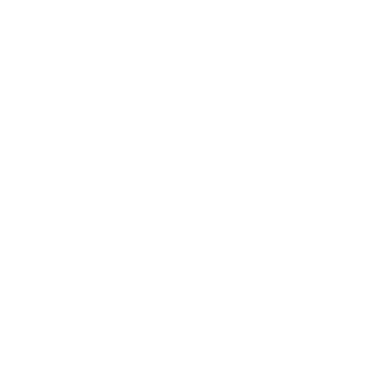

242 60 50


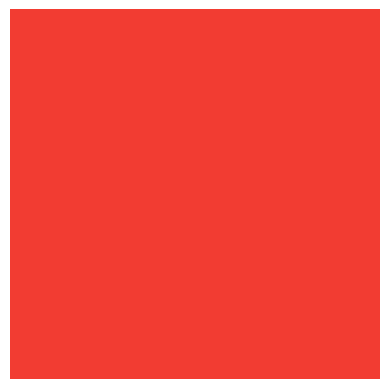

255 151 77


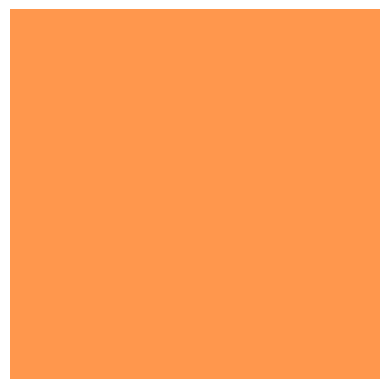

99 214 104


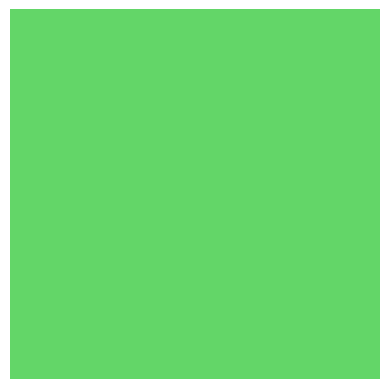

129 31 31


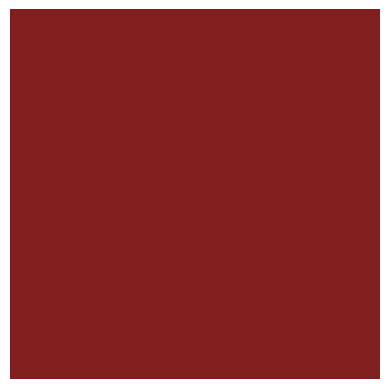

In [35]:
for color in df["color_0"].astype(str).unique():
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r'\d+', color)
    print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    plt.axis("off")
    plt.imshow([[(r, g, b)]])
    plt.show()

In [36]:
df["color_0"].astype(str).unique()

array(['[255 255 255]', '[242  60  50]', '[255 151  77]', '[ 99 214 104]',
       '[129  31  31]'], dtype=object)

In [37]:
color_map = {"[255 255 255]": "white", "[242  60  50]": "red", "[255 151  77]": "orange", "[ 99 214 104]": "green", "[129  31  31]": "darkred"}

In [38]:
df.dtypes

path                 object
timestamp    datetime64[ns]
color_0              object
p0_red                uint8
p0_green              uint8
p0_blue               uint8
color_1              object
p1_red                uint8
p1_green              uint8
p1_blue               uint8
color_2              object
p2_red                uint8
p2_green              uint8
p2_blue               uint8
color_3              object
p3_red                uint8
p3_green              uint8
p3_blue               uint8
color_4              object
p4_red                uint8
p4_green              uint8
p4_blue               uint8
dtype: object

In [39]:
for i, p in enumerate(points):
    df[f"traffic_color_{i}"] = df[f"color_{i}"].astype(str).map(color_map)
df.sort_values(by="timestamp").head()

,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,p1_blue,...,p3_blue,color_4,p4_red,p4_green,p4_blue,traffic_color_0,traffic_color_1,traffic_color_2,traffic_color_3,traffic_color_4
114,shots/rotselaar_20230515-170412.png,2023-05-15 17:04:12,"[255, 151, 77]",255,151,77,"[255, 151, 77]",255,151,77,...,104,"[99, 214, 104]",99,214,104,orange,orange,orange,green,green
67,shots/rotselaar_20230515-171930.png,2023-05-15 17:19:30,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,104,"[99, 214, 104]",99,214,104,red,red,red,green,green
55,shots/rotselaar_20230515-172546.png,2023-05-15 17:25:46,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,104,"[99, 214, 104]",99,214,104,red,red,red,green,green
88,shots/rotselaar_20230515-172942.png,2023-05-15 17:29:42,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,104,"[99, 214, 104]",99,214,104,red,red,red,green,green
103,shots/rotselaar_20230515-173440.png,2023-05-15 17:34:40,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,104,"[99, 214, 104]",99,214,104,red,red,red,green,green


In [40]:
df_all_colors = df.groupby("traffic_color_0").agg({"p0_red": "first", "p0_green": "first", "p0_blue": "first",})
df_all_colors

,p0_red,p0_green,p0_blue
traffic_color_0,,,
darkred,129,31,31
green,99,214,104
orange,255,151,77
red,242,60,50
white,255,255,255


In [41]:
df_all_colors["p0_red"]

traffic_color_0
darkred    129
green       99
orange     255
red        242
white      255
Name: p0_red, dtype: uint8

In [42]:
matplotlib_colors = df_all_colors.apply(lambda x: np.array([x["p0_red"]/255, x["p0_green"]/255, x["p0_blue"]/255]), axis=1)
matplotlib_colors

traffic_color_0
darkred    [0.5058823529411764, 0.12156862745098039, 0.12...
green      [0.38823529411764707, 0.8392156862745098, 0.40...
orange         [1.0, 0.592156862745098, 0.30196078431372547]
red        [0.9490196078431372, 0.23529411764705882, 0.19...
white                                        [1.0, 1.0, 1.0]
dtype: object

In [43]:
matplot_lib_map = {v:k for k,v in enumerate(matplotlib_colors.index.values)}
matplot_lib_map

{'darkred': 0, 'green': 1, 'orange': 2, 'red': 3, 'white': 4}

In [44]:
for i, p in enumerate(points):
    df[f"matplotlib_color_{i}_index"] = df[f"traffic_color_{i}"].map(matplot_lib_map)
df.head()

,path,timestamp,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,p1_green,p1_blue,...,traffic_color_0,traffic_color_1,traffic_color_2,traffic_color_3,traffic_color_4,matplotlib_color_0_index,matplotlib_color_1_index,matplotlib_color_2_index,matplotlib_color_3_index,matplotlib_color_4_index
0,shots/rotselaar_20230516-011517.png,2023-05-16 01:15:17,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,white,white,white,white,white,4,4,4,4,4
1,shots/rotselaar_20230516-145350.png,2023-05-16 14:53:50,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,red,red,red,green,green,3,3,3,1,1
2,shots/rotselaar_20230517-014210.png,2023-05-17 01:42:10,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,white,white,white,white,white,4,4,4,4,4
3,shots/rotselaar_20230517-042532.png,2023-05-17 04:25:32,"[255, 255, 255]",255,255,255,"[255, 255, 255]",255,255,255,...,white,white,white,white,white,4,4,4,4,4
4,shots/rotselaar_20230516-113705.png,2023-05-16 11:37:05,"[242, 60, 50]",242,60,50,"[242, 60, 50]",242,60,50,...,red,red,red,green,green,3,3,3,1,1


In [45]:
matplotlib_colors.dtype

dtype('O')

In [46]:
np.stack(matplotlib_colors.values)

array([[0.50588235, 0.12156863, 0.12156863],
       [0.38823529, 0.83921569, 0.40784314],
       [1.        , 0.59215686, 0.30196078],
       [0.94901961, 0.23529412, 0.19607843],
       [1.        , 1.        , 1.        ]])

In [47]:
color_space = np.stack(matplotlib_colors.values)
color_space

array([[0.50588235, 0.12156863, 0.12156863],
       [0.38823529, 0.83921569, 0.40784314],
       [1.        , 0.59215686, 0.30196078],
       [0.94901961, 0.23529412, 0.19607843],
       [1.        , 1.        , 1.        ]])

In [48]:
df["matplotlib_color_0_index"].values

array([4, 3, 4, 4, 3, 4, 2, 1, 2, 4, 2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 3,
       4, 4, 2, 3, 0, 0, 4, 4, 2, 2, 3, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2,
       3, 1, 1, 3, 2, 4, 2, 4, 2, 4, 4, 3, 3, 3, 3, 4, 2, 4, 2, 3, 4, 1,
       1, 3, 4, 1, 4, 2, 4, 4, 2, 2, 3, 4, 2, 3, 3, 1, 3, 3, 2, 2, 4, 2,
       3, 1, 3, 1, 3, 4, 4, 2, 2, 3, 4, 1, 0, 3, 4, 3, 2, 4, 4, 4, 2, 4,
       3, 1, 4, 4, 2, 4, 3, 2, 2, 1, 4, 2, 4, 2, 3, 2, 0, 2, 4, 4, 2, 4,
       3, 4, 4, 2, 2, 1, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2,
       3, 2, 3, 3])

In [49]:
df["timestamp"].dt.strftime("%m/%d")

0      05/16
1      05/16
2      05/17
3      05/17
4      05/16
       ...  
153    05/16
154    05/15
155    05/16
156    05/15
157    05/16
Name: timestamp, Length: 158, dtype: object

In [50]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2023-05-15 17:04:12'), Timestamp('2023-05-17 13:40:17'))

In [51]:
df["timestamp"].sort_values().index

Int64Index([114,  67,  55,  88, 103,  63,  13, 127,  80,  56,
            ...
             39,  83,  18,  99,  50,  11,  91,   7,  81,  69],
           dtype='int64', length=158)

In [52]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

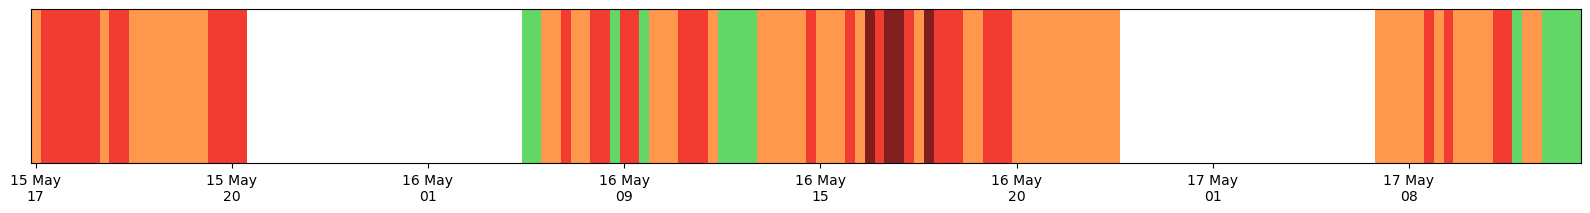

In [61]:
from matplotlib import colors
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

traffic_colorspace = colors.ListedColormap(color_space)

fig, ax = plt.subplots(figsize = (20,2))
ax.imshow([df["matplotlib_color_0_index"].values], cmap=traffic_colorspace, aspect="auto");
ax.set(xticks=df["timestamp"].sort_values().index, xticklabels=df["timestamp"].sort_values().dt.strftime("%d %h\n%H"));
# ax.set(xticklabels=df["timestamp"].sort_values().dt.strftime("%d %h\n%H"));
ax.xaxis.set_major_locator(ticker.AutoLocator())
# myFmt = DateFormatter("%m/%d")
# ax.xaxis.set_major_formatter(myFmt)
# myFmt_minor = DateFormatter("%h")
# ax.xaxis.set_minor_formatter(myFmt_minor)
# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# ## Rotate date labels automatically
# fig.autofmt_xdate();
ax.get_yaxis().set_visible(False);

In [54]:
df_resampled = df.set_index("timestamp").resample("5Min").ffill()

In [55]:
all_color_indexes = [f"matplotlib_color_{i}_index" for i, p in enumerate(points)]
all_color_indexes

['matplotlib_color_0_index',
 'matplotlib_color_1_index',
 'matplotlib_color_2_index',
 'matplotlib_color_3_index',
 'matplotlib_color_4_index']

In [56]:
df_resampled[["matplotlib_color_0_index", "matplotlib_color_1_index"]].T.values

array([[nan,  2.,  2., ...,  1.,  1.,  1.],
       [nan,  2.,  2., ...,  1.,  1.,  1.]])

In [67]:
df_all_colors.index

Index(['darkred', 'green', 'orange', 'red', 'white'], dtype='object', name='traffic_color_0')

In [72]:
color2speed_map = {"white": "No traffic", "green": "Some", "orange": "Light", "red": "Dense", "darkred": "Heavy"}

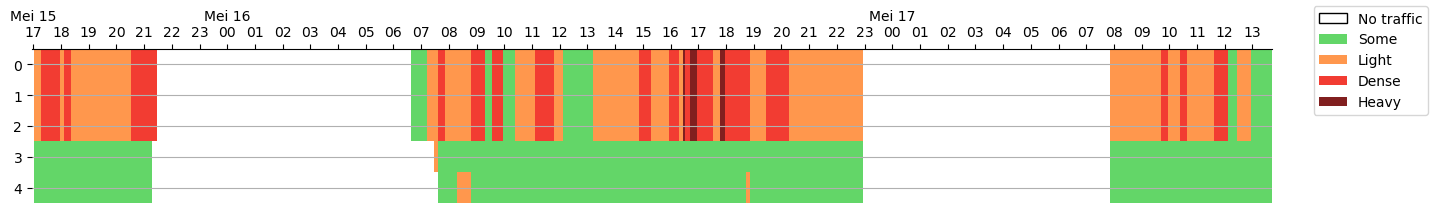

In [84]:
fig, ax = plt.subplots(figsize = (16,2))
ax.matshow(df_resampled[all_color_indexes].T.values, cmap=traffic_colorspace, aspect="auto");
ax.xaxis.set_major_locator(ticker.FixedLocator([12*t for t in range(46)]))
labels = df_resampled.index[::12].strftime("%d\n%H").values.copy()

sparse_labels = [labels[0]]
for l1, l2 in zip(labels[:-1], labels[1:]):
    label = f"Mei {l2}" if l1[:2] != l2[:2] else l2[3:]
    sparse_labels.append(label)
sparse_labels[0] = "Mei 15\n17"
# sparse_labels.append(int(sparse_labels[-1])+1)
ax.xaxis.set_major_formatter(ticker.FixedFormatter(sparse_labels))
ax.grid(axis = "y")
ax.set_axisbelow(False)
# ax.get_yaxis().set_visible(False);
# ax.set(xticks=df_resampled.index, xticklabels=df_resampled.index.strftime("%d %h\n%H"));
# ax.set(xticklabels=df_resampled.index.strftime("%d %h\n%H"));
# ax.set(xticklabels=df_resampled.index)

# ax.xaxis.set_major_locator(DayLocator(interval=24*12))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(24*12))

# ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %h\n%H"))

# ax.xaxis.set_major_formatter(
#     mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# ## Rotate date labels automatically
# fig.autofmt_xdate();

patches = []
for idx, row in df_all_colors.reindex(color2speed_map.keys()).iterrows():
    color = (row["p0_red"]/255, row["p0_green"]/255, row["p0_blue"]/255)
    if idx == "white":
        patch = mpatches.Patch(facecolor=color, label=color2speed_map[idx], edgecolor="k")
    else:
        patch = mpatches.Patch(facecolor=color, label=color2speed_map[idx])
    patches.append(patch)
fig.legend(handles=patches, loc='outside right upper');
ax.tick_params(which="major", bottom=False);
for spine in ["bottom", "right", "left"]:
    ax.spines[spine].set_visible(False)


In [85]:
ctdf = (df.reset_index()
          .groupby(['timestamp','matplotlib_color_0_index'], as_index=False)
          .count()
          .rename(columns={'index':'ct'})
       )


In [89]:
ctdf

,timestamp,matplotlib_color_0_index,ct,path,color_0,p0_red,p0_green,p0_blue,color_1,p1_red,...,p4_blue,traffic_color_0,traffic_color_1,traffic_color_2,traffic_color_3,traffic_color_4,matplotlib_color_1_index,matplotlib_color_2_index,matplotlib_color_3_index,matplotlib_color_4_index
0,2023-05-15 17:04:12,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2023-05-15 17:19:30,3,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2023-05-15 17:25:46,3,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2023-05-15 17:29:42,3,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2023-05-15 17:34:40,3,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2023-05-17 12:41:38,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
154,2023-05-17 12:55:14,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
155,2023-05-17 13:13:33,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
156,2023-05-17 13:27:02,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


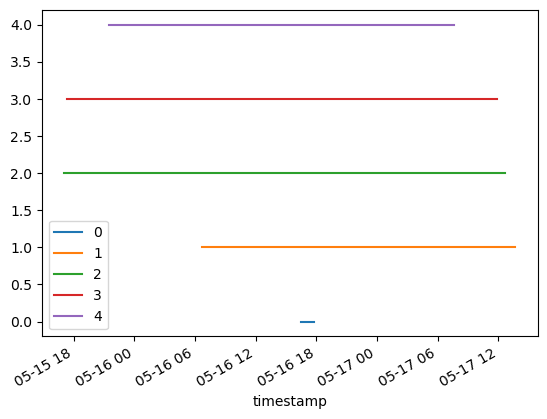

In [95]:
fig, ax = plt.subplots()
for key, data in ctdf.groupby('matplotlib_color_0_index'):
    data.plot(x='timestamp', y='matplotlib_color_0_index', ax=ax, label=key)

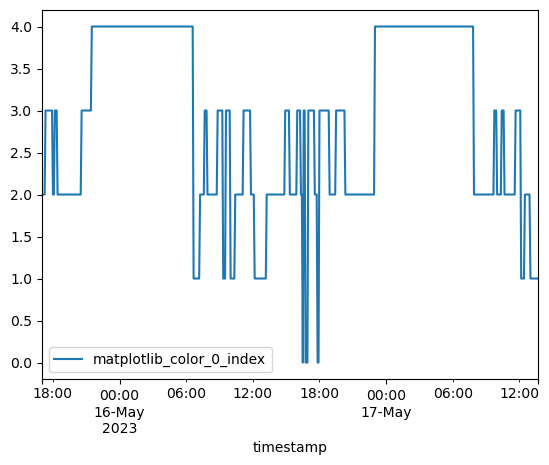

In [99]:
fig, ax = plt.subplots()
df_resampled.reset_index().plot(x='timestamp', y='matplotlib_color_0_index', ax=ax);